In [2]:
import numpy as np

In [3]:
X = np.array([
    [8, 4, 7],
    [2, 8, 1],
    [3, 1, 1],
    [9, 7, 4]
])

n = X.shape[0]
print("n =", n)

X_bar = X.T @ np.ones(n) / n
print("X_bar =", X_bar)

# S = (1/n * X.T @ X) - np.outer(X_bar, X_bar)
# S

S = np.cov(X, bias=True)
S

n = 4
X_bar = [5.5  5.   3.25]


array([[ 2.88888889, -4.88888889,  1.11111111,  0.44444444],
       [-4.88888889,  9.55555556, -1.11111111,  1.55555556],
       [ 1.11111111, -1.11111111,  0.88888889,  1.55555556],
       [ 0.44444444,  1.55555556,  1.55555556,  4.22222222]])

In [4]:
x1 = np.array([8, 4, 7])
x2 = np.array([2, 8, 1])
x3 = np.array([3, 1, 1])
x4 = np.array([9, 7, 4])

arrays = [x1, x2, x3, x4]

sum = 0
for array in arrays:
    sum += np.outer(array, array)
sum = sum / 4
    
S = sum - np.outer(X_bar, X_bar)
S

array([[9.25  , 1.    , 6.375 ],
       [1.    , 7.5   , 0.    ],
       [6.375 , 0.    , 6.1875]])

In [5]:
x1_sum = np.outer(x1, x1)
x2_sum = np.outer(x2, x2)
x3_sum = np.outer(x3, x3)
x4_sum = np.outer(x4, x4)

(x1_sum + x2_sum + x3_sum + x4_sum) / 4 - np.outer(X_bar, X_bar)

array([[9.25  , 1.    , 6.375 ],
       [1.    , 7.5   , 0.    ],
       [6.375 , 0.    , 6.1875]])

In [6]:
def H(x):
    p = len(x)
    H = np.eye(p) - 1/p * np.outer(np.ones(p), np.ones(p))
    return H @ x

def H2(x):
    p = len(x)
    H = np.eye(p) - 1/p * np.outer(np.ones(p), np.ones(p))
    H2 = H @ H
    return H2 @ x

In [7]:
x = np.array([2, -1, -2])

H(x)

array([ 2.33333333, -0.66666667, -1.66666667])

In [8]:
H2(x)

array([ 2.33333333, -0.66666667, -1.66666667])

In [9]:
u = 1/np.sqrt(5) * np.array([1, 2])

X1 = np.array([1, 2])
X2 = np.array([3, 4])
X3 = np.array([-1, 0])

def proj(X, u):
    return np.dot(X, u) * u

X = np.array([proj(vector, u) for vector in [X1, X2, X3]])
X

array([[ 1. ,  2. ],
       [ 2.2,  4.4],
       [-0.2, -0.4]])

In [10]:
n = X.shape[0]
print("n =", n)

H = (np.eye(n) - 1/n * np.outer(np.ones(n), np.ones(n)))

S = 1/n * X.T @ H @ X
S

n = 3


array([[0.96, 1.92],
       [1.92, 3.84]])

In [11]:
dot1 = np.dot(X1, u)
dot2 = np.dot(X2, u)
dot3 = np.dot(X3, u)

dots = np.array([dot1, dot2, dot3])
var = 1/3 * ((dot1 - dots.mean())**2 + (dot2 - dots.mean())**2 + (dot3 - dots.mean())**2)
var

4.799999999999999

In [12]:
u.T @ S @ u

4.799999999999998

In [13]:
X = np.array([
    [1, 0.5],
    [-1, -0.5]
])

X.T @ X

array([[2. , 1. ],
       [1. , 0.5]])

In [14]:
X = np.array([
    [0, 2],
    [1, -1],
    [-1, -1]
])

S = 1/2 * X.T @ X
S

array([[1., 0.],
       [0., 3.]])

In [15]:
X = np.array([
    [0, 2],
    [0, -2],
    [1, 1],
    [-1, -1]
])

n = X.shape[0]

S = 1/(n-1) * X.T @ X
S

array([[0.66666667, 0.66666667],
       [0.66666667, 3.33333333]])

In [16]:
lambda2 = 0.5092880150001402
lambda1 = 3.4907119849998596
p = 2
A = S - np.eye(p)*lambda1
B = S - np.eye(p)*lambda2

B

array([[0.15737865, 0.66666667],
       [0.66666667, 2.82404532]])

In [17]:
import scipy as sp

sp.linalg.null_space(A)

array([[0.22975292],
       [0.97324899]])

In [18]:
sp.linalg.null_space(B)

array([[-0.97324899],
       [ 0.22975292]])

In [19]:
np.real(sp.linalg.eigvals(S))

array([0.50928802, 3.49071198])

Multi-Dimensional Scaling (MDS)

In [20]:
from numpy import linalg as lg

In [21]:
X = np.array([
    [1, 1],
    [1, -1],
    [-1, 1]
])

B = X @ X.T  # Gram matrix
B

array([[ 2,  0,  0],
       [ 0,  2, -2],
       [ 0, -2,  2]])

In [22]:
np.real(sp.linalg.eigvals(B))

array([4.0000000e+00, 4.4408921e-16, 2.0000000e+00])

In [23]:
lg.eig(B)[0]  # eigenvalues

array([4.0000000e+00, 4.4408921e-16, 2.0000000e+00])

In [24]:
lg.eig(B)[1]  # eigenvectors

array([[ 0.        ,  0.        ,  1.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ]])

In [25]:
1/np.sqrt(2)

0.7071067811865475

In [29]:
# import sympy as sy

# # Define the variable
# a = sy.symbols('a')
# p12 = (np.e)**(-1) / (2*(np.e)**(-1) + (np.e)**(-2))
# p13 = p12
# p23 = (np.e)**(-2) / (2*(np.e)**(-1) + (np.e)**(-2))

# q12 = (np.e)**(-a**2) / (2*(np.e)**(-a**2) + (np.e)**(-4*a**2))
# q13 = q12
# q23 = (np.e)**(-4*a**2) / (2*(np.e)**(-a**2) + (np.e)**(-4*a**2))

# f = p12 * sy.log(p12 / q12) + p13 * sy.log(p13 / q13) + p23 * sy.log(p23 / q23)
# f_simplified = sy.simplify(f)
# f_simplified

# # Solve the equation
# solutions = sy.solve(f_simplified, a)
# print(solutions)

# Cannot find an analytical solution

In [2]:
from scipy.optimize import fsolve
import numpy as np

# Define the function
def f(a):
    p12 = np.exp(-1) / (2 * np.exp(-1) + np.exp(-2))
    p13 = p12
    p23 = np.exp(-2) / (2 * np.exp(-1) + np.exp(-2))
    
    q12 = np.exp(-a**2) / (2 * np.exp(-a**2) + np.exp(-4*a**2))
    q13 = q12
    q23 = np.exp(-4*a**2) / (2 * np.exp(-a**2) + np.exp(-4*a**2))
    
    return p12 * np.log(p12 / q12) + p13 * np.log(p13 / q13) + p23 * np.log(p23 / q23)

# Initial guess for the root
initial_guess = 0.1

# Solve the equation numerically
solution = fsolve(f, initial_guess)
print(solution)

[0.57735027]


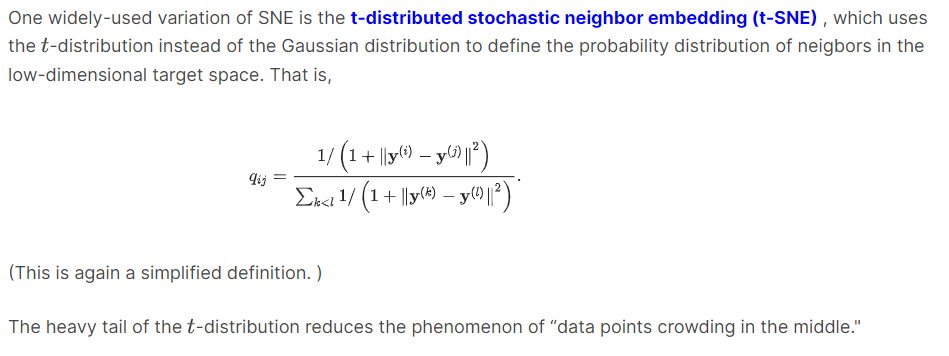

In [9]:
p12 = np.exp(-1) / (2 * np.exp(-1) + np.exp(-2))
p12

0.4223187982515182

In [10]:
def g(a):
    num = 1/(1+a**2)
    denom = 2*num + 1/(1+4*a**2)
    return num/denom - p12

fsolve(g, 1)

array([1.15784634])